# Reachability

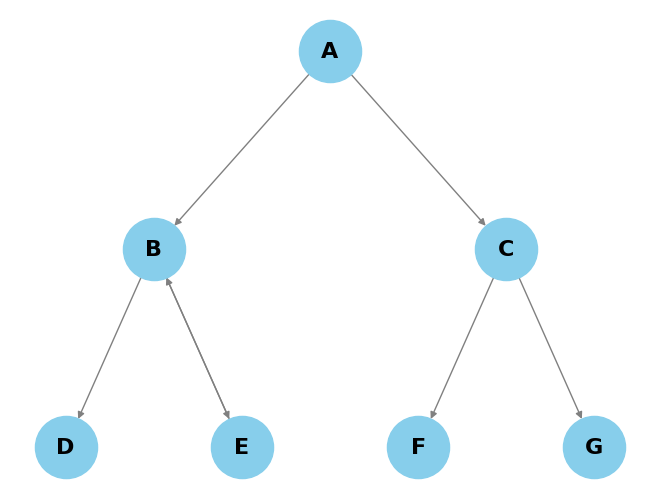

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import Any

# Define the adjacency list
adj_list = {'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F', 'G'], 'D': [], 'E': ['B'], 'F': [], 'G': []}

# Create the graph
G = nx.DiGraph(adj_list)

# Define the position of each node manually
pos = {
    'A': (0, 3),
    'B': (-1, 2),
    'C': (1, 2),
    'D': (-1.5, 1),
    'E': (-0.5, 1),
    'F': (0.5, 1),
    'G': (1.5, 1),
}

# Draw the graph
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_color='black', font_weight='bold', edge_color='gray')
plt.show()

## With bfs

In [28]:
def bfs(G: dict[Any, Any], v_start: Any, v_target: Any, traversal_order: bool=False) -> bool:
    if v_start == v_target:
        return True 
    # Declare all vertices as unvisited. 
    visited = {v: False for v in G}
    visited[v_start] = True

    queue = [v_start]
    while len(queue) > 0:
        v_current = queue.pop(0)
        for v in G[v_current]:
            if v == v_target:
                return True
            if visited[v] is False: 
                queue.append(v)
                visited[v] = True
    return False

In [29]:
print(f"E is reachable from A: {bfs(G, 'A', 'E')}")
print(f"D is reachable from E: {bfs(G, 'E', 'D')}")
print(f"A is reachable from E: {bfs(G, 'E', 'A')}")

E is reachable from A: True
D is reachable from E: True
A is reachable from E: False


## With dfs

In [30]:
def dfs(G: dict[Any, Any], v_start: Any, v_target: Any, traversal_order: bool=False) -> bool:
    if v_start == v_target:
        return True 
    # Declare all vertices as unvisited. 
    visited = {v: False for v in G}
    visited[v_start] = True

    queue = [v_start]
    while len(queue) > 0:
        v_current = queue.pop(-1)
        for v in reversed(G[v_current]):
            if v == v_target:
                return True
            if visited[v] is False: 
                queue.append(v)
                visited[v] = True
    return False

In [31]:
print(f"E is reachable from A: {bfs(G, 'A', 'E')}")
print(f"D is reachable from E: {bfs(G, 'E', 'D')}")
print(f"A is reachable from E: {bfs(G, 'E', 'A')}")

E is reachable from A: True
D is reachable from E: True
A is reachable from E: False


## Dominators

In [32]:
adj_list = {
    'R': ['A', 'B', 'C', 'D', 'E', 'H', 'I'],
    'A': [],
    'B': [],
    'C': ['F', 'G'],
    'D': ['L'],
    'E': [],
    'F': [],
    'G': ['J'],
    'H': [],
    'I': [],
    'J': [],
    'K': [],
    'L': []
}

In [33]:
def dom_graph(G: dict, root: Any):
    S = set()
    for v in G:
        if v != root:
            if bfs(G, root, v) is True:
                S.add(v)
         
    
    return S


In [34]:
print(dom_graph(adj_list, 'R'))

{'F', 'I', 'E', 'L', 'D', 'G', 'B', 'J', 'C', 'H', 'A'}
